# Support Vector Regression

# Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Import data

In [3]:
# Import dataset
df_sal = pd.read_csv('/content/Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Analyze data

## Describe

In [4]:
# Describe data
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


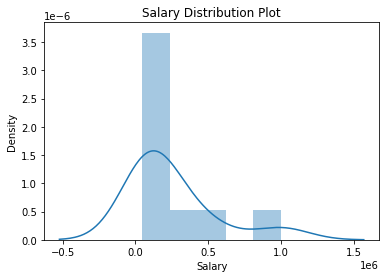

In [5]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

## Relation between Salary and Level

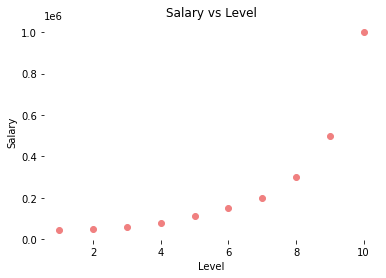

In [6]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

# Split data into independent/dependent vectors

In [7]:
# Split dataset into dependent/independent vectors
X = df_sal.iloc[:, 1:-1].values
y = df_sal.iloc[:, -1].values

# Feature scaling

In [8]:
# Reshape vector y
y = y.reshape(len(y), 1)

# Scale datasets
sc_X = StandardScaler()
sc_y = StandardScaler()
X_ = sc_X.fit_transform(X)
y_ = sc_y.fit_transform(y)

# Train model

In [9]:
# Train SVR model
regressor = SVR(kernel = 'rbf')
regressor.fit(X_, y_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predict results

In [10]:
# Predict results
print(sc_y.inverse_transform([regressor.predict(sc_X.transform([[7.5]]))]))
y_pred = sc_y.inverse_transform([regressor.predict(X_)])

[[263740.85328003]]


In [11]:
# Reshape results
y_pred = y_pred.flatten()
y_pred = y_pred.reshape(len(y_pred), 1)

# Visualize results

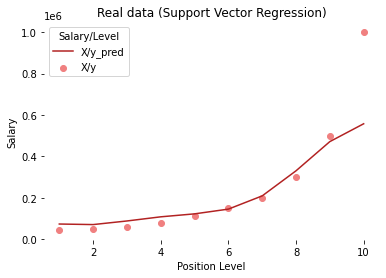

In [12]:
# Visualizing results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, y_pred, color = 'firebrick')
plt.title('Real data (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()